In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/manual_2_20210128-230301_traj.csv")

In [3]:
print(data)
num = 2
new_data = [None]*num
for i in range(num):
    new_data[i] = data[data["ID"] == i]
    new_data[i] = new_data[i][["time","ID", "x", "y"]]


    time  ID     x     y
0    0.2   0  1.46  2.01
1    0.2   1 -1.46 -2.01
2    0.8   0  1.37  1.89
3    0.8   1 -1.37 -1.89
4    1.3   0  1.19  1.65
5    1.3   1 -1.20 -1.65
6    1.9   0  0.92  1.40
7    1.9   1 -0.93 -1.39
8    2.4   0  0.64  1.17
9    2.4   1 -0.66 -1.16
10   3.0   0  0.36  1.01
11   3.0   1 -0.39 -0.99
12   3.5   0  0.07  0.77
13   3.5   1 -0.12 -0.72
14   4.1   0 -0.18  0.53
15   4.1   1  0.11 -0.46
16   4.6   0 -0.48  0.37
17   4.6   1  0.39 -0.28
18   5.2   0 -0.80  0.19
19   5.2   1  0.70 -0.07
20   5.7   0 -1.04 -0.07
21   5.7   1  0.92  0.20
22   6.3   0 -1.19 -0.39
23   6.3   1  1.04  0.54
24   6.8   0 -1.33 -0.71
25   6.8   1  1.15  0.87
26   7.4   0 -1.47 -1.00
27   7.4   1  1.28  1.16
28   7.9   0 -1.54 -1.37
29   7.9   1  1.36  1.54


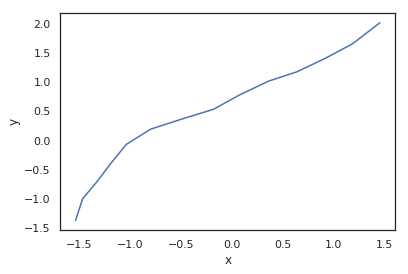

In [4]:
sns.set(style="white")
traj_plot = sns.lineplot(data=new_data[0], x="x", y="y")

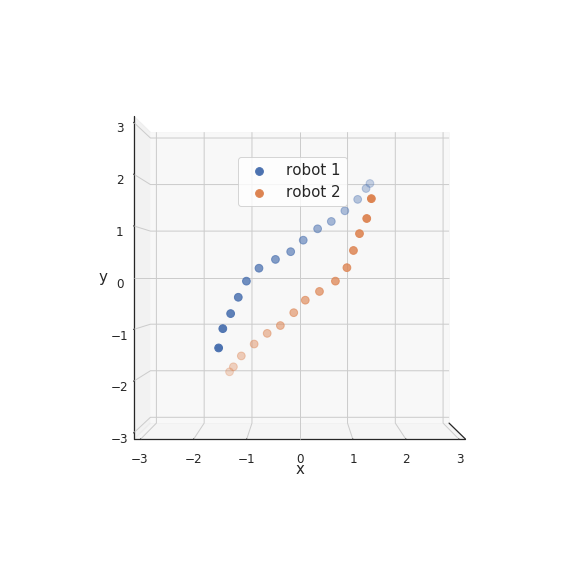

In [5]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
x = new_data[0]['time']
y = new_data[0]['x']
z = new_data[0]['y']

x2 = new_data[1]['time']
y2 = new_data[1]['x']
z2 = new_data[1]['y']



#ax.set_xlabel("time")
ax.set_ylabel("x", fontsize = 15)
ax.set_zlabel("y", fontsize = 15)

fig.set_figheight(10)
fig.set_figwidth(10)


ax.scatter(x, y, z, label="robot 1", s=60)
ax.scatter(x2, y2, z2, label="robot 2", s=60)

ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
#ax.set_top_view()
ax.view_init(0,0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper center',bbox_to_anchor=(0.5, 0.750), fontsize=15)

#plt.gca().axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.show()

In [7]:
from math import *
# Calculate the distance of trajectories
x_arr = [None]*num
y_arr = [None]*num
x = [None]*num
y = [None]*num
traj_dist = [0.0]*num
euclidean_dist = [0.0]*num
for i in range(num):
    x_arr[i] = new_data[i]["x"]
    y_arr[i] = new_data[i]["y"]
    x[i] = x_arr[i].to_numpy()
    y[i] = y_arr[i].to_numpy()
#print(x)
#print(y)
#print(len(new_data[0])-1)
for i in range(len(new_data[0])-1):
    for j in range(num):
        #print(x_arr[j])
        traj_dist[j] += sqrt((x[j][i]-x[j][i+1])**2+(y[j][i]-y[j][i+1])**2)
for j in range(num):
    #print(x_arr[j])
    euclidean_dist[j] += sqrt((x[j][0]-x[j][-1])**2+(y[j][0]-y[j][-1])**2)
print(traj_dist)
print(euclidean_dist)
print(np.average(np.array(euclidean_dist)/np.array(traj_dist)))



[5.808966519288735, 5.466870220397352]
[4.687877984760269, 4.9522722057657536]
0.8564384763277988
